# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

#### 1. Exploratory Data Analysis (EDA)
- Libraries, Dataset, Data

#### 2. Data Preprocessing
- Scaling
- Separeting the dataframe

#### 3. Multi-class Classification
- libraries
- SVM Classifer
- Decision Tree Classifier
- Random Forest Classifer
- XGBoost Classifer
- Comparing The Models



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
from skimpy import clean_columns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import yellowbrick

## Ingesting data from links and making a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
path = "https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr"
df_male = pd.read_csv(path, encoding='ISO-8859-1')

In [3]:
path = "https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq"
df_female = pd.read_csv(path,  encoding='ISO-8859-1')


## Data

In [4]:
df_male.sample(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
1204,14781,217,1391,326,214,1304,230,199,429,331,257,496,67,344,309,142,957,234,854,630,522,371,1479,263,962,236,1253,795,634,383,39,66,25,212,787,99,268,353,307,527,481,1112,89,217,195,151,566,200,337,71,340,341,1052,640,400,440,473,536,472,73,382,115,382,427,1411,114,417,263,1154,357,154,885,869,572,1812,1713,1409,1086,573,172,811,462,126,882,1604,441,296,859,206,364,1048,717,174,802,Male,14-Mar-11,Camp Atterbury,Army National Guard,Combat Support,88N,Arizona,1,NaN,1,28,68,155,Right hand
1760,16310,278,1530,351,242,1402,264,202,411,364,273,520,76,343,327,148,1057,252,908,643,524,386,1591,292,1142,275,1375,881,653,386,38,76,24,279,853,104,282,355,317,628,485,1199,84,205,200,156,603,212,356,71,354,399,1127,665,405,438,505,584,515,81,425,123,421,450,1537,119,450,271,1216,382,147,970,927,614,1854,1842,1529,1178,662,188,809,491,136,934,1781,484,340,1031,274,446,1114,981,181,925,Male,26-Apr-11,Fort Drum,Regular Army,Combat Arms,13B,Arkansas,1,NaN,1,35,73,215,Right hand
3530,28330,206,1366,323,215,1264,242,193,423,334,258,501,70,341,328,140,946,216,866,593,489,367,1429,279,1000,232,1228,801,591,338,35,59,18,248,752,98,261,333,297,567,470,1027,88,212,190,154,565,196,314,72,318,340,1025,620,401,419,465,518,465,69,365,119,370,399,1376,108,417,257,1155,355,159,867,876,587,1772,1659,1351,1079,551,160,753,434,127,850,1559,444,289,818,206,328,1017,687,165,782,Male,29-Feb-12,Camp Shelby,Army National Guard,Combat Service Support,12T,Mississippi,1,NaN,1,23,67,155,Right hand
1582,15492,248,1357,309,248,1255,261,193,420,365,292,509,75,337,314,143,1023,253,831,572,461,418,1445,308,1088,251,1213,781,620,368,41,67,24,257,810,104,263,327,309,595,458,1062,86,209,193,151,592,210,356,76,343,383,996,630,453,476,462,536,473,78,454,123,402,438,1360,114,408,251,1201,337,146,935,875,553,1717,1703,1372,1048,630,183,751,447,134,845,1677,460,340,971,242,400,990,866,177,813,Male,11-Apr-11,Fort Drum,Regular Army,Combat Service Support,88M,New York,1,NaN,1,38,66,193,Left hand
892,14003,298,1330,307,212,1196,241,175,408,351,263,511,70,326,316,141,984,252,801,588,468,367,1398,298,1076,260,1156,759,647,359,36,64,25,251,754,91,235,309,302,589,424,1028,84,201,173,147,547,185,312,66,336

In [5]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [6]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [7]:
df_female.shape

(1986, 108)

In [8]:
df_female.isnull().sum()

SubjectId                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [9]:
df_male.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [10]:
df_male.shape

(4082, 108)

In [11]:
df_male.drop(columns='subjectid', inplace=True)
df_female.drop(columns='SubjectId', inplace=True)

In [12]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [13]:
df.reset_index()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,52

In [14]:
df = clean_columns(df)

14 column names have been cleaned

In [15]:
df.sample(10)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primary_mos,subjects_birth_location,subject_numeric_race,ethnicity,dod_race,age,heightin,weightlbs,writing_preference
5327,223,1293,315,220,1196,222,188,388,300,253,430,68,313,283,127,988,231,810,583,474,378,1360,264,903,232,1180,778,605,311,35,60,21,215,738,91,248,315,266,440,441,1006,75,178,183,141,560,191,317,74,337,384,976,610,372,405,439,510,462,63,432,106,328,361,1234,110,387,241,1069,334,154,841,820,541,1680,1599,1316,1033,629,169,710,430,123,824,1511,426,270,814,217,353,947,654,158,749,Female,10-Nov-11,Fort Gordon,Army National Guard,Combat Service Support,25Q,Germany,2,NaN,2,21,62,137,Right hand
5275,237,1388,333,238,1303,250,194,366,301,274,449,76,304,267,135,1078,245,874,619,503,427,1436,285,942,252,1272,826,690,372,34,54,22,223,760,98,254,327,267,519,453,1098,76,188,181,149,575,198,331,79,380,429,1030,595,384,418,466,541,500,65,434,126,334,395,1310,108,402,257,1044,356,132,872,840,576,1731,1690,1380,1103,662,176,745,449,133,887,1594,418,300,865,209,366,1023,777,158,819,Female,8-Nov-11,Fort Gordon,Regular Army,Combat Service Support,25U,Illinois,1,NaN,1,20,67,160,Right hand
151,310,1501,341,227,1385,266,208,445,395,278,562,77,360,356,140,1078,302,953,647,527,427,1575,302,1225,303,1365,883,685,395,36,69,24,284,848,108,281,362,338,662,483,1156,92,222,195,152,584,204,355,71,357,401,1079,605,475,486,495,560,495,75,429,129,447,473,1563,116,425,272,1295,367,157,955,931,595,1875,1819,1511,1167,687,197,899,481,133,943,1841,510,371,1100,301,465,1084,1099,181,889,Male,18-Oct-10,Fort Hood,Regular Army,Combat Service Support,351L,Connecticut,251,Cherokee,2,36,72,236,Right hand
2271,276,1400,323,234,1291,262,200,418,373,287,536,77,345,330,150,1047,248,856,616,504,407,1478,292,1102,255,1271,847,611,342,37,63,25,247,767,109,267,335,330,612,469,1146,93,220,190,160,582,199,340,74,352,376,1043,630,470,470,478,545,484,74,410,117,404,424,1383,116,419,265,1183,351,145,876,880,575,1825,1694,1407,1082,659,197,818,461,133,880,1625,464,363,1010,246,384,1034,894,178,835,Male,29-Jul-11,Fort Stewart,Regular Army,Combat Arms,11B,Texas,31,Mexican,3,24,68,197,Right hand
2497,283,1466,336,261,1342,257,204,435,407,279,580,78,344,333,146,1157,266,885,625,517,412,1538,311,1162,274,1316,857,645,353,31,62,23,276,821,104,287,348,332,639,482,1162,92,220,194,148,584,198,353,78,388,431,1074,615,

In [16]:
df.shape

(6068, 107)

In [17]:
df.isnull().sum()

abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth                           0
chestheight              

In [18]:
df['ethnicity'].value_counts()

Mexican                                               357
Puerto Rican                                          183
Caribbean Islander                                    124
Filipino                                               67
Cherokee                                               65
Korean                                                 53
Dominican                                              32
Chinese                                                26
Japanese                                               22
Vietnamese                                             21
Cuban                                                  17
Colombian                                              17
Arab or Middle Eastern                                 17
Salvadoran                                             16
East/Asian Indian                                      13
Samoan                                                 11
Mexican Puerto Rican                                   10
Honduran      

In [19]:
df.dod_race.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dod_race, dtype: int64

In [20]:
df = df[df.dod_race < 4]

In [21]:
df.reset_index()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,date,installation,component,branch,primary_mos,subjects_birth_location,subject_numeric_race,ethnicity,dod_race,age,heightin,weightlbs,writing_preference
0,0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572

In [22]:
df.shape

(5769, 107)

In [23]:
6068 - 5769

299

In [24]:
df['dod_race'].isnull().sum()

0

In [25]:
df = df.drop(columns=['ethnicity',	'date',	'installation',	'component', "writing_preference",	'branch',	'primary_mos',	'subjects_birth_location'])

In [26]:
df = df.drop(columns=['weightlbs'])

In [27]:
df.reset_index()

,index,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subject_numeric_race,dod_race,age,heightin
0,0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,1,1,41,71
1,1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,1,1,35,68
2,2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,2,2,42,68
3,3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,1,1,31,66
4,4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,2,2,21,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [28]:
df.shape

(5769, 98)

In [29]:
df.isnull().sum().sum()

0

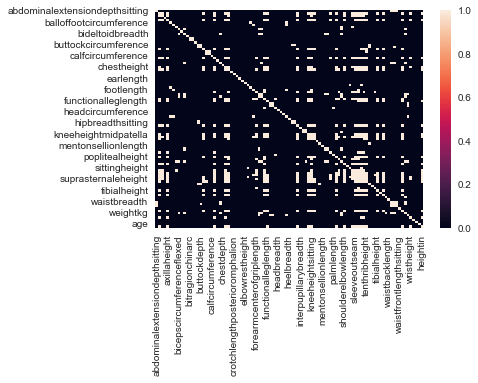

In [30]:
sns.heatmap(df.corr() > 0.85)
plt.show()

In [31]:
df.select_dtypes('O')

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
6063,Female
6064,Female
6065,Female
6066,Female


In [32]:
# df.groupby("writing_preference").dod_race.value_counts().plot(kind='bar')

In [33]:
# # sns.barplot(df, x=df.writing_preference, y=df.writing_preference.value_counts)

# # sns.barplot(data=df, x="writing_preference", y="dod_race", hue="dod_race")

# ax = sns.countplot(data=df, x="writing_preference", hue="dod_race")
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# for container in ax.containers:
#     ax.bar_label(container, size=14)
# plt.show()

In [34]:
def get_outliers(col, data=df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    n_of_rows_above_upper = len(df[df[col] >= upper][col])
    n_of_rows_below_lower = len(df[df[col] <= lower][col])
    tot_n_of_outliers = n_of_rows_above_upper + n_of_rows_below_lower
    print('[', col, ']')
    print('Outlier Statistics')
    print('-'*27)
    print("IQR                   : ", iqr)
    print("Q1                    : ", q1)
    print("Q3                    : ", q3)
    print("Upper threshold       : ", upper)
    print("Lower threshold       : ", lower)
    print("N of rows above upper : ", n_of_rows_above_upper)
    print("N of rows below lower : ", n_of_rows_below_lower)
    print("Total N of outliers   : ", tot_n_of_outliers)
#     print('-'*27)
    print(' '*27)
#     print("BoxPlot of", col)
#     sns.boxplot(data=df, x=col)
#     print(' '*27)


In [35]:
# df["gender"].map({"Male":0,"Female":1}) # mapping the classes to 0 and 1
df.gender.replace(to_replace="Male", value=1, inplace=True)
df.gender.replace(to_replace="Female", value=0, inplace=True)
df.gender

0       1
1       1
2       1
3       1
4       1
       ..
6063    0
6064    0
6065    0
6066    0
6067    0
Name: gender, Length: 5769, dtype: int64

In [36]:
# for i in df.columns:
#     get_outliers(i, df)

In [37]:
df.weightkg.describe()

count    5769.000000
mean      800.981106
std       155.990338
min       358.000000
25%       686.000000
50%       790.000000
75%       900.000000
max      1442.000000
Name: weightkg, dtype: float64

In [38]:
df["weightkg"] = df.weightkg/10

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, we scale our data if features not in same scale.

In [39]:
X = df.drop(columns='dod_race')
y =df.dod_race

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [41]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # calculating Tolerance for each feature
    vif["Tolerance"]=1/(vif["VIF"])
    return(vif)
calc_vif(X)

,Variables,VIF,Tolerance
0,abdominalextensiondepthsitting,740.571850,0.001350
1,acromialheight,57775.116953,0.000017
2,acromionradialelength,7070.274104,0.000141
3,anklecircumference,1103.547685,0.000906
4,axillaheight,28386.829970,0.000035
5,balloffootcircumference,2206.908986,0.000453
6,balloffootlength,3488.198376,0.000287
7,biacromialbreadth,3137.114317,0.000319
8,bicepscircumferenceflexed,821.657609,0.001217
9,bicristalbreadth,726.056912,0.001377


# Modelling

## 1. Logistic model

In [42]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :f1_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'recall_test'   :recall_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'precision_test':precision_score(y_test, y_pred_test, average=average, labels=labels)[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :f1_score(y_train, y_pred_train, average=average, labels=labels)[0],        
        'recall_train'   :recall_score(y_train, y_pred_train, average=average, labels=labels)[0],
        'precision_train':precision_score(y_train, y_pred_train, average=average, labels=labels)[0],
    }, orient='index', columns=[model_name]).T

### Vanilla Logistic Model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model = LogisticRegression()

SCALING

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
cat = X_train.select_dtypes("object").columns
cat 

Index([], dtype='object')

In [47]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())  #one hot ve minmax yapıyor

In [48]:
operations = [("scaler", MinMaxScaler()), ("model", model)]
pipe_model = Pipeline(steps=operations)

In [49]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

### EVALUATION

TEST REPORT
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       766
           2       0.91      0.90      0.91       258
           3       0.64      0.32      0.42       130

    accuracy                           0.88      1154
   macro avg       0.81      0.73      0.75      1154
weighted avg       0.86      0.88      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.88      0.97      0.92      3026
           2       0.91      0.90      0.90      1040
           3       0.70      0.33      0.45       549

    accuracy                           0.88      4615
   macro avg       0.83      0.73      0.76      4615
weighted avg       0.87      0.88      0.86      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.878683,0.925,0.966057,0.88729,0.87649,0.922399,0.968275,0.880673


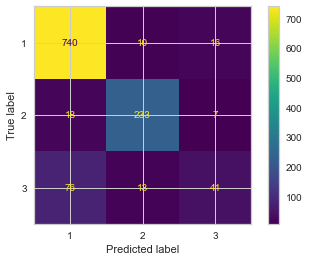

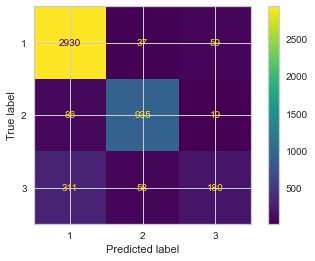

In [50]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

### TRAINING

In [51]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [52]:
model.coef_

array([[ 1.13077612e-01,  6.97154206e-01,  1.17964812e+00,
         2.70357772e+00,  2.90016347e-01,  5.36953526e-01,
        -5.26889938e-01, -3.39403383e-02, -1.61159275e+00,
         2.30102493e+00, -1.96471746e+00, -2.64910457e-01,
        -3.02824668e+00,  4.10718323e-02, -7.57052374e-01,
         3.83043281e-02, -1.22090772e+00, -6.66842077e-01,
        -4.34475432e-01, -8.31873168e-01,  1.93509974e+00,
         8.55396952e-01,  1.47443798e+00,  5.26467724e-01,
         1.20593226e+00,  6.05201169e-01, -2.22791833e-01,
         3.69242816e-01,  3.82166810e-01, -3.57076275e-02,
        -4.19497266e-02,  5.64982145e-01, -7.84798419e-01,
         1.50467929e+00, -1.48196563e+00, -5.01739492e-01,
        -1.11420551e+00,  3.67090398e-01,  5.38552746e-01,
        -8.90775567e-01, -2.20009969e-01,  1.12941319e+00,
         1.03430107e+00, -6.32476483e-01,  4.06092378e-01,
        -1.12521477e+00,  1.50567623e+00, -1.57416576e+00,
        -3.17407937e+00,  1.14474288e+00,  9.97591487e-0

In [53]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 2, 2])

In [54]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[7.91493681e-01, 1.90815229e-01, 1.76910907e-02],
       [9.72144359e-01, 2.12862413e-03, 2.57270165e-02],
       [9.78062979e-01, 1.21055184e-02, 9.83150271e-03],
       ...,
       [9.06563417e-01, 3.78110227e-03, 8.96554804e-02],
       [6.05002384e-04, 9.98114583e-01, 1.28041452e-03],
       [6.85715855e-03, 9.80927600e-01, 1.22152419e-02]])

In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [56]:
accuracy_score(y_test,y_pred)

0.878682842287695

In [57]:
pipe_model.score(X_test, y_test)

0.878682842287695

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [59]:
confusion_matrix(y_test,y_pred)

array([[740,  10,  16],
       [ 18, 233,   7],
       [ 76,  13,  41]])

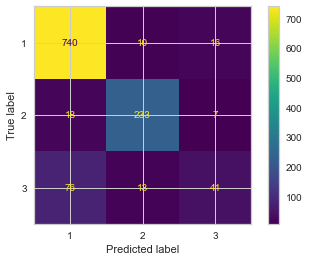

In [60]:
plot_confusion_matrix(pipe_model, X_test, y_test);

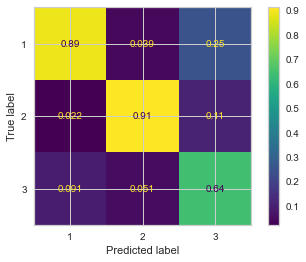

In [61]:
plot_confusion_matrix(pipe_model, X_test, y_test, normalize='pred');

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.97      0.93       766
           2       0.91      0.90      0.91       258
           3       0.64      0.32      0.42       130

    accuracy                           0.88      1154
   macro avg       0.81      0.73      0.75      1154
weighted avg       0.86      0.88      0.86      1154



In [63]:
y_train_pred = pipe_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.88      0.97      0.92      3026
           2       0.91      0.90      0.90      1040
           3       0.70      0.33      0.45       549

    accuracy                           0.88      4615
   macro avg       0.83      0.73      0.76      4615
weighted avg       0.87      0.88      0.86      4615



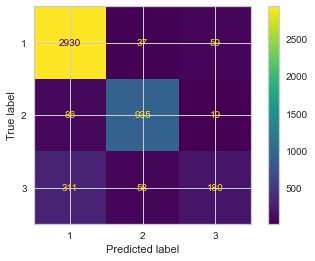

In [64]:
plot_confusion_matrix(pipe_model, X_train, y_train);

In [65]:
from sklearn.model_selection import cross_validate

In [66]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [67]:
model = LogisticRegression()

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.156623,0.005767,NaN,NaN,NaN,NaN
2,0.120833,0.001137,NaN,NaN,NaN,NaN
3,0.140370,0.001169,NaN,NaN,NaN,NaN
4,0.109599,0.001133,NaN,NaN,NaN,NaN
5,0.105197,0.006631,NaN,NaN,NaN,NaN
6,0.091755,0.001118,NaN,NaN,NaN,NaN
7,0.131031,0.001188,NaN,NaN,NaN,NaN
8,0.124505,0.001149,NaN,NaN,NaN,NaN
9,0.146403,0.001172,NaN,NaN,NaN,NaN
10,0.109818,0.001154,NaN,NaN,NaN,NaN


In [68]:
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

In [69]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = pipe_model.predict(X_train)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       766
           2       0.91      0.90      0.91       258
           3       0.64      0.32      0.42       130

    accuracy                           0.88      1154
   macro avg       0.81      0.73      0.75      1154
weighted avg       0.86      0.88      0.86      1154

Train Set

              precision    recall  f1-score   support

           1       0.88      0.97      0.92      3026
           2       0.91      0.90      0.90      1040
           3       0.70      0.33      0.45       549

    accuracy                           0.88      4615
   macro avg       0.83      0.73      0.76      4615
weighted avg       0.87      0.88      0.86      4615



### Scoring for a Specific Race: 3

In [70]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =[3]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =[3]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[3])}

In [71]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_f1_Hispanic,test_precision_Hispanic,test_recall_Hispanic
1,0.463091,0.002551,0.465409,0.355769,0.672727
2,0.329598,0.002516,0.503311,0.395833,0.690909
3,0.378726,0.002534,0.452830,0.346154,0.654545
4,0.275391,0.002350,0.540881,0.413462,0.781818
5,0.329260,0.002471,0.531469,0.431818,0.690909
6,0.334022,0.002466,0.505882,0.373913,0.781818
7,0.352052,0.005568,0.507246,0.421687,0.636364
8,0.257210,0.002373,0.462500,0.352381,0.672727
9,0.337408,0.002325,0.469799,0.372340,0.636364
10,0.314405,0.002460,0.425806,0.326733,0.611111


### Logistic Model GridsearchCV

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

log_model = LogisticRegression(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
])
param_grid = {
    "log__penalty" : ['l1', 'l2', 'none'],
    "log__C" : np.linspace(0.1, 5, 3),
    "log__class_weight" : [None, "balanced"],
    "log__solver" : ["lbfgs", "liblinear", "sag", "saga"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=f1_2, # 'f1_macro'
#     error_score="raise",
    n_jobs=-1,
    cv=5
    ) 

In [73]:
recall_3 =  make_scorer(recall_score, average=None, labels=[3])

In [74]:
grid_model.fit(X_train,y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index([], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': array([0.1 , 2.55, 5.  ]),
                         'log__class_weight': [None, 'balanced'],
                         'log__penalty': ['l1', 'l2', 'none'],
                         'log__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring=make_scorer(f1_score, average=None, labels=[2]))

In [75]:
grid_model.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'OneHotEncoder', 'log', 'OneHotEncoder__n_jobs', 'OneHotEncoder__remainder__clip', 'OneHotEncoder__remainder__copy', 'OneHotEncoder__remainder__feature_range', 'OneHotEncoder__remainder', 'OneHotEncoder__sparse_threshold', 'OneHotEncoder__transformer_weights', 'OneHotEncoder__transformers', 'OneHotEncoder__verbose', 'OneHotEncoder__verbose_feature_names_out', 'OneHotEncoder__onehotencoder', 'OneHotEncoder__onehotencoder__categories', 'OneHotEncoder__onehotencoder__drop', 'OneHotEncoder__onehotencoder__dtype', 'OneHotEncoder__onehotencoder__handle_unknown', 'OneHotEncoder__onehotencoder__max_categories', 'OneHotEncoder__onehotencoder__min_frequency', 'OneHotEncoder__onehotencoder__sparse', 'log__C', 'log__class_weight', 'log__dual', 'log__fit_intercept', 'log__intercept_scaling', 'log__l1_ratio', 'log__max_iter', 'log__multi_class', 'log__n_jobs', 'log__penalty', 'log__random_state', 'log__solver', 'log__tol', 'log__verbose', 'log__warm_start'])

In [76]:
grid_model.best_params_ # default accuracy score

{'log__C': 5.0,
 'log__class_weight': 'balanced',
 'log__penalty': 'l2',
 'log__solver': 'liblinear'}

In [77]:
grid_model.best_score_

0.8951969848501211

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       766
           2       0.89      0.95      0.92       258
           3       0.54      0.48      0.51       130

    accuracy                           0.88      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.88      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3026
           2       0.88      0.93      0.91      1040
           3       0.61      0.55      0.58       549

    accuracy                           0.88      4615
   macro avg       0.81      0.80      0.80      4615
weighted avg       0.88      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.87695,0.919021,0.945736,0.893773,0.879957,0.905164,0.926923,0.884404


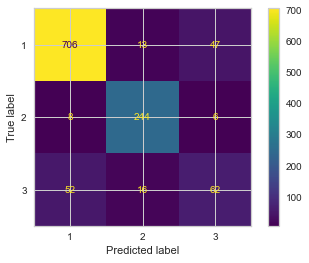

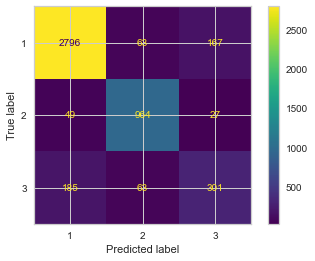

In [78]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

## 2. SVC

### Vanilla SVC model 

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [81]:
operations = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_model = Pipeline(steps=operations)

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       766
           2       0.89      0.95      0.92       258
           3       0.54      0.48      0.51       130

    accuracy                           0.88      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.88      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3026
           2       0.88      0.93      0.91      1040
           3       0.61      0.55      0.58       549

    accuracy                           0.88      4615
   macro avg       0.81      0.80      0.80      4615
weighted avg       0.88      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.87695,0.919021,0.945736,0.893773,0.879957,0.905164,0.926923,0.884404


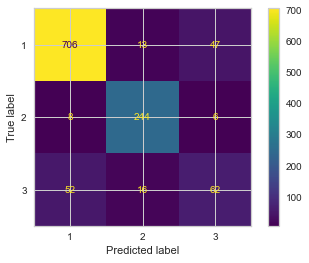

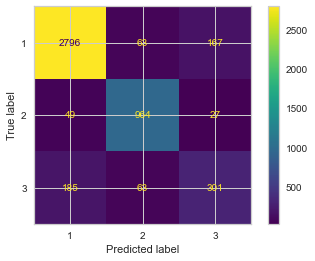

In [82]:
pipe_model.fit(X_train, y_train)
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

In [83]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.498383
test_precision_Hispanic    0.399960
test_recall_Hispanic       0.661151
dtype: float64

###  SVC Model GridsearchCV

In [84]:
param_grid = {
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [85]:
operations= [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_3,
                              n_jobs=-1)

In [86]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5] END ........svc__C=1, svc__gamma=scale;, score=0.633 total time=   0.8s
[CV 4/5] END ........svc__C=1, svc__gamma=scale;, score=0.664 total time=   0.9s
[CV 3/5] END ........svc__C=1, svc__gamma=scale;, score=0.709 total time=   0.9s
[CV 2/5] END ........svc__C=1, svc__gamma=scale;, score=0.627 total time=   0.9s
[CV 1/5] END ........svc__C=1, svc__gamma=scale;, score=0.673 total time=   0.9s
[CV 2/5] END .........svc__C=1, svc__gamma=auto;, score=0.691 total time=   1.3s
[CV 1/5] END .........svc__C=1, svc__gamma=auto;, score=0.664 total time=   1.4s
[CV 3/5] END .........svc__C=1, svc__gamma=auto;, score=0.682 total time=   1.3s
[CV 2/5] END ............svc__C=1, svc__gamma=1;, score=0.518 total time=   1.0s
[CV 3/5] END ............svc__C=1, svc__gamma=1;, score=0.609 total time=   1.0s
[CV 1/5] END ............svc__C=1, svc__gamma=1;, score=0.545 total time=   1.0s
[CV 4/5] END .........svc__C=1, svc__gamma=auto;

GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index([], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=3)

In [87]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 0.1}

In [88]:
svm_model_grid.best_score_

0.6884737281067557

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       766
           2       0.89      0.95      0.92       258
           3       0.54      0.48      0.51       130

    accuracy                           0.88      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.88      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3026
           2       0.88      0.93      0.91      1040
           3       0.61      0.55      0.58       549

    accuracy                           0.88      4615
   macro avg       0.81      0.80      0.80      4615
weighted avg       0.88      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.87695,0.919021,0.945736,0.893773,0.879957,0.905164,0.926923,0.884404


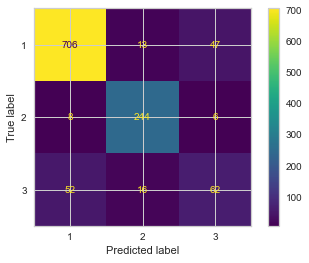

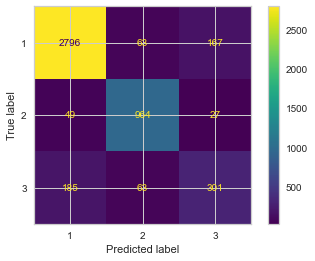

In [89]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

In [90]:
# precisionrecallcurve çizdirmek için 2 tane yaklaşım
from yellowbrick.classifier import PrecisionRecallCurve
# 2.from scikitplot.metrics import plot_roc, precision_recall_curve , 
# ..from scikitplot.metrics import plot_precision_recall

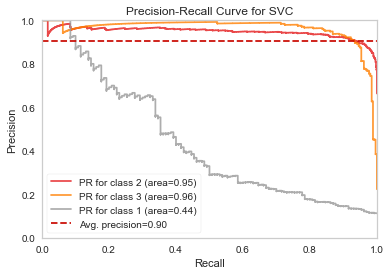

In [91]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["2", "3", "1"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## 3. RF

### Vanilla RF Model

In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes("object").columns.to_list()    
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough'
)

In [93]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for DecisionTree Classifier
pipe_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('dt', DecisionTreeClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       766
           2       0.89      0.95      0.92       258
           3       0.54      0.48      0.51       130

    accuracy                           0.88      1154
   macro avg       0.78      0.78      0.78      1154
weighted avg       0.87      0.88      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.92      0.92      0.92      3026
           2       0.88      0.93      0.91      1040
           3       0.61      0.55      0.58       549

    accuracy                           0.88      4615
   macro avg       0.81      0.80      0.80      4615
weighted avg       0.88      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.87695,0.919021,0.945736,0.893773,0.879957,0.905164,0.926923,0.884404


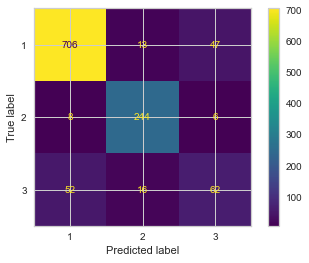

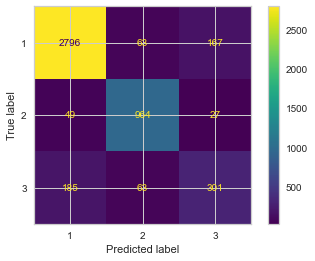

In [94]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

In [95]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.949928
test_precision_2    0.953205
test_recall_2       0.947115
dtype: float64

### RF Model GridsearchCV

In [96]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
param_grid = {
    "dt__splitter":["best", "random"],
    "dt__max_features":[None, "auto", "log2", 3, 4, 6, 7],
    "dt__max_depth": [None, 2, 3, 4, 5],
#     "dt__min_samples_leaf": [1, 3, 5, 7],
#     "dt__min_samples_split": [2, 5, 7, 9]
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=f1_2, 
    n_jobs=-1,
    cv=5,
)

In [97]:
grid_model.fit(X_train, y_train)

/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/homebre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [None, 2, 3, 4, 5],
                         'dt__max_features': [None, 'auto', 'log2', 3, 4, 6, 7],
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=None, labels=[2]))

In [98]:
grid_model.best_params_

{'dt__max_depth': 4, 'dt__max_features': None, 'dt__splitter': 'best'}

In [99]:
grid_model.best_score_

0.9580309262284841

TEST REPORT
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       766
           2       0.96      0.95      0.95       258
           3       0.96      0.82      0.88       130

    accuracy                           0.96      1154
   macro avg       0.96      0.92      0.94      1154
weighted avg       0.96      0.96      0.96      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           1       0.95      0.99      0.97      3026
           2       0.96      0.96      0.96      1040
           3       0.97      0.76      0.85       549

    accuracy                           0.95      4615
   macro avg       0.96      0.90      0.93      4615
weighted avg       0.95      0.95      0.95      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Decision Tree,0.959272,0.95499,0.945736,0.964427,0.953196,0.959923,0.955769,0.964113


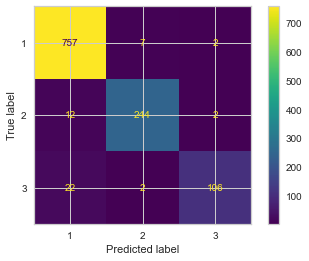

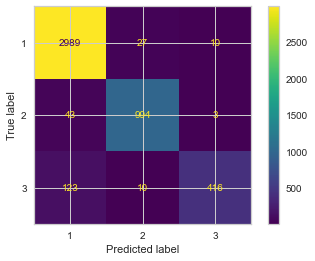

In [100]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

## 4. XGBoost

### Vanilla XGBoost Model

In [101]:
import xgboost as xgb
xgb.__version__

'0.90'

In [102]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_model = XGBClassifier(random_state=42)

# pipeline for XGBClassifier Classifier
pipe_xgb = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])

In [103]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.80206436, 0.50837189, 0.50837189, ..., 0.50837189, 0.50837189,
       2.80206436])

In [104]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [105]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0       
0      0.508372    3026
1      1.479167    1040
2      2.802064     549
Name: 0, dtype: int64

In [106]:
pipe_xgb.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('xgb',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.01      0.01       766
           2       0.03      0.02      0.02       258
           3       0.00      0.00      0.00       130

    accuracy                           0.01      1154
   macro avg       0.01      0.01      0.01      1154
weighted avg       0.02      0.01      0.01      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3026
           1       0.98      1.00      0.99      1040
           2       0.90      1.00      0.95       549

    accuracy                           0.98      4615
   macro avg       0.96      0.99      0.97      4615
weighted avg       0.98      0.98      0.98      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.009532,0.0,0.0,0.0,0.981365,0.986265,0.972902,1.0


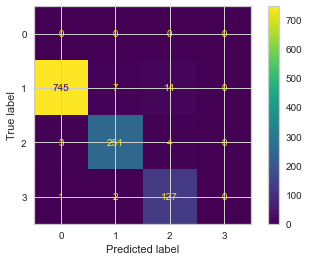

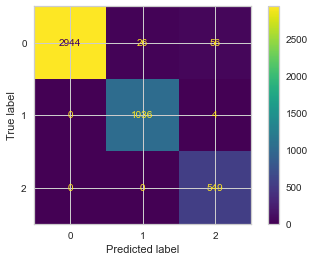

In [107]:
eval_metric(pipe_xgb, X_train, y_train, X_test, y_test)

In [108]:
from sklearn.model_selection import cross_validate, cross_val_score

xgb_model = XGBClassifier(random_state=42)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
    fit_params={"xgb__sample_weight":classes_weights}
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2           0.911699
test_precision_2    0.868746
test_recall_2       0.959850
dtype: float64

In [109]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=42)

# pipeline for GridsearchCV
model = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
]) 
param_grid = {
    'xgb__n_estimators':[100,150],
    'xgb__learning_rate': [0.1, 0.3],
    'xgb__max_depth':[2,3],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
#     'xgb__min_child_weight' : [8],
#     'xgb__min_split_loss': [0.8],
#     'xgb__reg_lambda' : [1],
#     'xgb__grow_policy': ['depthwise'],
#     'xgb__eval_metric' : ["merror"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    verbose=1,
    scoring=f1_2,
    refit=True,
    n_jobs=-1
)

In [110]:
%%time
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: user 2.48 s, sys: 60.7 ms, total: 2.54 s
Wall time: 1min 14s


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         [])])),
                                       ('xgb',
                                        XGBClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1],
                         'xgb__learning_rate': [0.1, 0.3],
                         'xgb__max_depth': [2, 3],
                         'xgb__n_estimators': [100, 150],
                         'xgb__subsample': [0.8, 1]},
             scoring=make_scorer(f1_score, average=None, labels=[2]),
             verbose=1)

TEST REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.03      0.01      0.01       766
           2       0.01      0.01      0.01       258
           3       0.00      0.00      0.00       130

    accuracy                           0.01      1154
   macro avg       0.01      0.00      0.01      1154
weighted avg       0.02      0.01      0.01      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3026
           1       0.96      0.99      0.98      1040
           2       0.91      0.95      0.93       549

    accuracy                           0.98      4615
   macro avg       0.96      0.97      0.96      4615
weighted avg       0.98      0.98      0.98      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.007799,0.010076,0.007752,0.014388,0.976165,0.930605,0.952641,0.909565


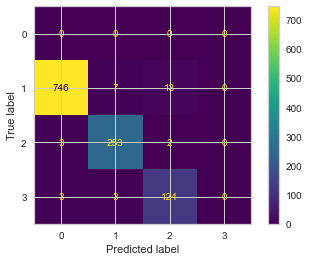

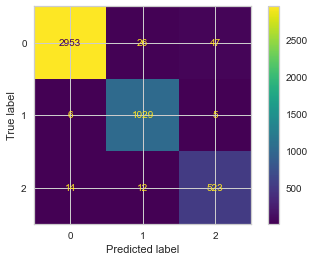

In [111]:
out_score_xgb = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[2]
)
out_score_xgb

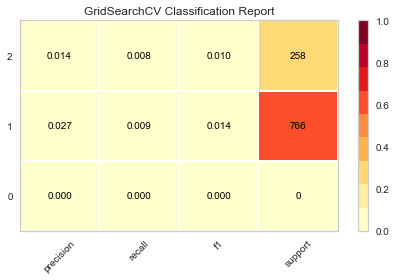

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [112]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### XGBoost Model GridsearchCV

In [113]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [114]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_3, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; t

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.7s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.1s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.5s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.5s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total t

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.8s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.6s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.7s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.1s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.1s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.1s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.5s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.3s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s
[CV] END XGB_model__colsample_bytree=0.8, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   0.9s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=  

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.9s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.5s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.2s

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.2s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.4s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.5s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.6s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.6s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   0.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.1, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.0s
[CV]

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.1s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.1s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=  

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.9s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to

[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.8s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=1, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   1.9s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=0.8; total time=   1.4s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.3s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=50, XGB_model__subsample=1; total time=   1.4s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.6s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.6s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.7s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=0.8; total time=   2.6s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.6s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.5s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.5s


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.1s
[CV] END XGB_model__colsample_bytree=1, XGB_model__learning_rate=0.3, XGB_model__max_depth=2, XGB_model__n_estimators=100, XGB_model__subsample=1; total time=   2.2s


In [115]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, max_depth=1,
                               n_estimators=50, objective='multi:softprob',
                               random_state=101, subsample=0.8))])

In [116]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 50,
 'XGB_model__subsample': 0.8}

In [117]:
xgb_grid_model.best_score_

0.0

TEST REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       766
           2       0.24      0.21      0.22       258
           3       0.00      0.00      0.00       130

    accuracy                           0.05      1154
   macro avg       0.06      0.05      0.06      1154
weighted avg       0.05      0.05      0.05      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3026
           1       1.00      0.79      0.88      1040
           2       0.57      0.99      0.72       549

    accuracy                           0.91      4615
   macro avg       0.85      0.91      0.86      4615
weighted avg       0.95      0.91      0.92      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.045927,0.0,0.0,0.0,0.908126,0.96481,0.933245,0.998586


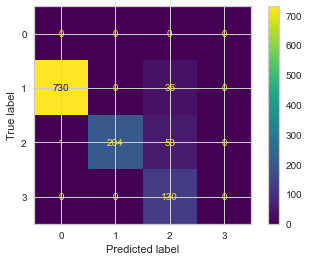

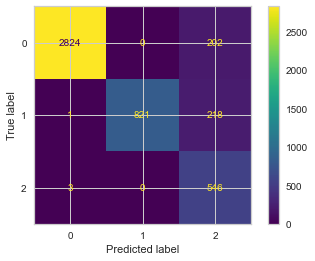

In [118]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

In [119]:
#pip install scikit-plot

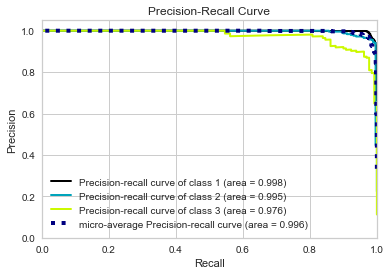

In [120]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


perations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [121]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9948202150395669

In [122]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[3])

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [123]:
#pip install imblearn

In [124]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)

In [ ]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train) # X_over 9102 e çıkıyor. 

In [ ]:
X_over.shape

In [ ]:
y_over.value_counts() 

In [ ]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)  # under 

In [ ]:
X_under.shape

In [ ]:
y_under.value_counts()

In [ ]:
over = SMOTE(sampling_strategy={3: 1000})
under = RandomUnderSampler(sampling_strategy={1: 2500})

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_train.value_counts() 

In [ ]:
y_resampled_over.value_counts() 

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train) #X_resampled_over, y_resampled_over

In [ ]:
y_resampled_under.value_counts() 

In [ ]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

## SVC Over/Under Sampling

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [ ]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)


In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [125]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

-0.221563654211257

In [126]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

-0.13548773403637338

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [127]:
#pip install shap

In [128]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [129]:
X_train_trans

array([[5.62248996e-01, 5.19685039e-01, 5.97222222e-01, ...,
        7.05882353e-03, 1.70731707e-01, 4.19354839e-01],
       [2.44979920e-01, 2.24409449e-01, 3.88888889e-01, ...,
        1.17647059e-02, 2.92682927e-01, 1.93548387e-01],
       [4.65863454e-01, 6.31889764e-01, 5.97222222e-01, ...,
        0.00000000e+00, 7.31707317e-02, 5.16129032e-01],
       ...,
       [2.65060241e-01, 3.46456693e-01, 4.51388889e-01, ...,
        0.00000000e+00, 3.90243902e-01, 3.22580645e-01],
       [5.90361446e-01, 6.83070866e-01, 6.52777778e-01, ...,
        0.00000000e+00, 1.95121951e-01, 5.80645161e-01],
       [2.20883534e-01, 2.14566929e-01, 3.88888889e-01, ...,
        4.70588235e-04, 2.43902439e-02, 1.93548387e-01]])

TEST REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.01      0.02       766
           2       0.07      0.07      0.07       258
           3       0.00      0.00      0.00       130

    accuracy                           0.02      1154
   macro avg       0.03      0.02      0.02      1154
weighted avg       0.04      0.02      0.03      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      3026
           1       0.90      0.90      0.90      1040
           2       0.40      0.72      0.52       549

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
,0.023397,0.0,0.0,0.0,0.820368,0.873773,0.808658,0.950291


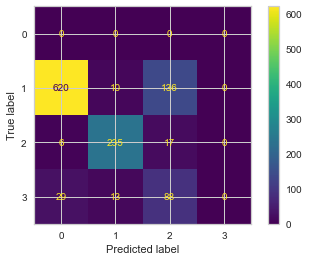

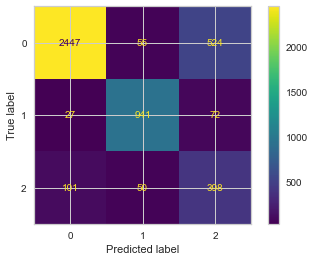

In [130]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

In [131]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_2           0.492337
test_precision_2    0.382117
test_recall_2       0.692077
dtype: float64

In [132]:
X_train.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heel

In [133]:
features = column_trans_shap.get_feature_names_out(X_train.columns) # Featurelarımızın isimlerini alalım altta kullanacağız
features

array(['remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bideltoidbreadth',
       'remainder__bimalleolarbreadth', 'remainder__bitragionchinarc',
       'remainder__bitragionsubmandibulararc',
       'remainder__bizygomaticbreadth', 'remainder__buttockcircumference',
       'remainder__buttockdepth', 'remainder__buttockheight',
       'remainder__buttockkneelength',
       'remainder__buttockpopliteallength',
       'remainder__calfcircumference', 'remainder__cervicaleheight',
       'remainder__chestbreadth', 'remainder__chestcircumference',
       'remainder__chestdepth', 'remainder__chestheight',
       'remainder__crotchheight', 'remainder__

In [135]:
import shap

In [ ]:
explainer = shap.Explainer(log_model,X_train_trans)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test_trans[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Deployment 

In [ ]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

# Tüm data ile işlem yapıyoruz artık
# LogisticRegression default değerleri kullanmıştı(grid search te)

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [ ]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,gender,subject_numeric_race,age,heightin
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.00000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,491.454845,72.335413,324.962212,306.677760,139.529381,1022.059456,242.234356,872.112845,610.449991,498.331773,386.316519,1479.952158,283.232623,1024.206622,252.322586,1254.290172,827.105738,622.693708,351.880222,35.175420,62.606171,22.227249,240.553302,786.399203,98.915063,263.512394,339.458832,295.661640,553.098284,467.898769,1104.347201,85.098111,204.215635,189.574796,152.043682,570.424337,196.640839,333.274918,70.834113,348.930837,386.417923,1042.152366,632.534928,412.773964,433.017334,476.665280,541.376668,484.316693,69.76183,406.943144,119.601664,376.127578,414.554516,1390.525048,114.106604,417.227076,259.757670,1131.214422,354.805166,145.202288,898.592477,868.361068,578.013001,1766.951118,1716.938984,1405.392442,1101.631479,623.583637,176.696481,791.044548,459.389149,129.580343,884.659386,1632.470966,460.990293,318.409950,916.817126,230.459178,377.352054,1033.591090,80.098111,169.308372,831.334547,0.675854,16.894436,29.776391,68.359508
std,37.457748,78.303123,20.444554,15.965783,71.260913,16.803556,1

In [ ]:
mean_human = X.describe(include="all").loc["mean"]  # Örnek uygulama yapmak için bir kişide mean değerleri olsun. Bunun ırkını belirlemek isteyelim
mean_human

abdominalextensiondepthsitting     247.254290
acromialheight                    1408.630265
acromionradialelength              328.071590
anklecircumference                 225.201768
axillaheight                      1301.902583
balloffootcircumference            244.408043
balloffootlength                   195.118911
biacromialbreadth                  399.706015
bicepscircumferenceflexed          341.663027
bicristalbreadth                   274.903449
bideltoidbreadth                   491.454845
bimalleolarbreadth                  72.335413
bitragionchinarc                   324.962212
bitragionsubmandibulararc          306.677760
bizygomaticbreadth                 139.529381
buttockcircumference              1022.059456
buttockdepth                       242.234356
buttockheight                      872.112845
buttockkneelength                  610.449991
buttockpopliteallength             498.331773
calfcircumference                  386.316519
cervicaleheight                   

In [ ]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.6882214126236109

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.6735448843142908